# モデルの学習曲線

In [1]:
import sys

path_up = ".."
if not path_up in sys.path:
    sys.path.append(path_up)

In [2]:
import matplotlib.font_manager as fm
from matplotlib import dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import make_smoothing_spline

from funcs.tse import get_ticker_name_list

In [3]:
date_str = "2025-08-28"
state = "新規"

code = "7011"
dict_name = get_ticker_name_list([code])
name_code = dict_name[code]
desc = f"{name_code} ({code}) / {date_str} のティックデータで学習（建玉100株で繰返売買）      "
filename = f"../output/learning_curve.csv"
print(filename)
imgname = f"output/{date_str}_{code}_learning_curve_2.png"
print(imgname)
df = pd.read_csv(filename, index_col=0)
df

../output/learning_curve.csv
output/2025-08-28_7011_learning_curve_1.png


,Epoch,Repeat,Data,Profit
0,0,0,tick_20250828.xlsx,-9300.0
1,1,1,tick_20250828.xlsx,-11000.0
2,2,2,tick_20250828.xlsx,-13800.0
3,3,3,tick_20250828.xlsx,-10700.0
4,4,4,tick_20250828.xlsx,-8400.0
...,...,...,...,...
95,95,95,tick_20250828.xlsx,-6800.0
96,96,96,tick_20250828.xlsx,-7100.0
97,97,97,tick_20250828.xlsx,-7000.0
98,98,98,tick_20250828.xlsx,-7900.0


In [4]:
spl = make_smoothing_spline(df["Epoch"], df["Profit"])
xs = np.linspace(0, len(df) - 1, 1000)

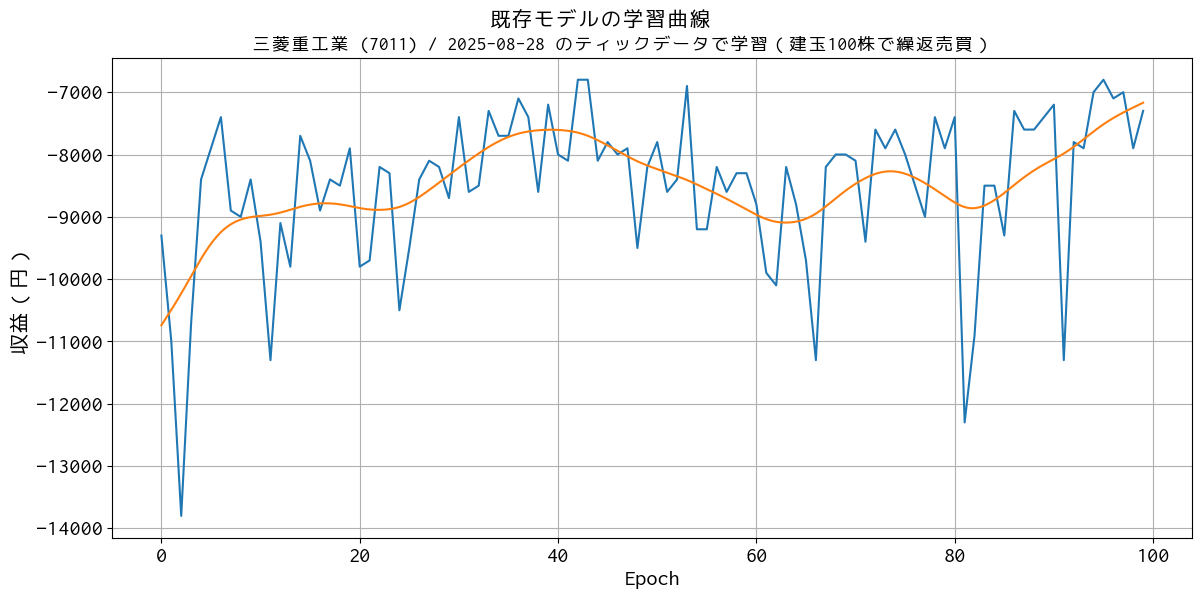

In [5]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df["Epoch"], df["Profit"])
ax.plot(xs, spl(xs))

fig.suptitle(f"{state}モデルの学習曲線", fontsize=16)
ax.set_title(desc, fontsize=14)
ax.grid()
ax.set_xlabel("Epoch")
ax.set_ylabel("収益（円）")

plt.tight_layout(pad=0.4, rect=[0, 0, 1.0, 1.0])
plt.savefig(imgname)
plt.show()